# House Pricing - A Statistical Analysis & Machine Learning

We will work on this step by step.
Topics:
1. Data Preparation
2. Data Analysis
3. Statistical Tests
4. Implement a linear regression model
5. Exploring model results
6. Some visualzations

# Importing necessary libraries and functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
plt.style.use('seaborn')
sns.set(palette='bright')
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.4f}'.format

In [4]:
from pagayapro.paths.data_paths import ASSIGNMENT3_DATA

# Load the datasets

load the data.

In [5]:
data = pd.read_csv(os.path.join(ASSIGNMENT3_DATA, "house_features.csv"))
data.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,"2,003.0000",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976.0000",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001.0000",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,"1,998.0000",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,"2,000.0000",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data.shape

(1460, 82)

## Split to train and test

We will split the data to train and test.
<br>We can't perform statistical analysis which includes the test data, since that would lead to **overfitting** on the test set (we will elaborate on that later on). Therfore we will first split the data.

In [7]:
train = data.sample(frac=0.8,random_state=1) # random_state is the random_seed
test = data.drop(train.index)

# Explore the data

## Number of rows and columns

Find how many rows and columns we have in train and test

In [8]:
print (f"Train has {train.shape[0]} rows and {train.shape[1]} columns")
print (f"Test has {test.shape[0]} rows and {test.shape[1]} columns")

Train has 1168 rows and 82 columns
Test has 292 rows and 82 columns


## Present a statistical description of the numerical features

Write down the mean, std, quantiles, etc of each of these features (can be done in one line of code)

In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,"1,168.0000",719.3219,420.3979,0.0000,351.7500,724.5000,"1,082.2500","1,457.0000"
Id,"1,168.0000",720.3219,420.3979,1.0000,352.7500,725.5000,"1,083.2500","1,458.0000"
MSSubClass,"1,168.0000",57.3459,42.8332,20.0000,20.0000,50.0000,70.0000,190.0000
LotFrontage,963.0000,70.1059,24.6127,21.0000,60.0000,69.0000,80.0000,313.0000
LotArea,"1,168.0000","10,355.9110","8,390.0070","1,300.0000","7,500.0000","9,452.5000","11,601.5000","164,660.0000"
OverallQual,"1,168.0000",6.0873,1.3981,1.0000,5.0000,6.0000,7.0000,10.0000
OverallCond,"1,168.0000",5.5736,1.1192,1.0000,5.0000,5.0000,6.0000,9.0000
YearBuilt,"1,168.0000","1,971.4854",30.2503,"1,872.0000","1,954.0000","1,973.0000","2,001.0000","2,010.0000"
YearRemodAdd,"1,168.0000","1,984.6704",20.7046,"1,950.0000","1,966.0000","1,993.0000","2,004.0000","2,010.0000"
MasVnrArea,"1,162.0000",104.9509,186.8202,0.0000,0.0000,0.0000,163.7500,"1,600.0000"


## General questions on the data:

How many features are numerical? 

In [10]:
train.select_dtypes('number').shape[1]

39

What is the median of the LotFrontage feature?


In [11]:
train['LotFrontage'].median()

69.0

What is the feature with the largest standard deviation?

In [12]:
train.std().sort_values(ascending = False)
# SalePrice is a label so the FEATURE with largest std is LotArea

SalePrice       80,521.2100
LotArea          8,390.0070
MiscVal            549.5847
GrLivArea          530.5305
BsmtFinSF1         464.6336
TotalBsmtSF        447.6257
BsmtUnfSF          444.6071
2ndFlrSF           437.7416
Id                 420.3979
Unnamed: 0         420.3979
1stFlrSF           390.8679
GarageArea         212.9000
MasVnrArea         186.8202
BsmtFinSF2         157.1603
WoodDeckSF         124.0268
OpenPorchSF         64.0452
EnclosedPorch       62.3954
ScreenPorch         56.6167
LowQualFinSF        47.5181
PoolArea            44.8969
MSSubClass          42.8332
YearBuilt           30.2503
3SsnPorch           27.3477
GarageYrBlt         24.7374
LotFrontage         24.6127
YearRemodAdd        20.7046
MoSold               2.7013
TotRmsAbvGrd         1.6240
OverallQual          1.3981
YrSold               1.3301
OverallCond          1.1192
BedroomAbvGr         0.8262
GarageCars           0.7461
Fireplaces           0.6449
FullBath             0.5571
BsmtFullBath        

What is data the type of each feature?

In [13]:
train.dtypes

Unnamed: 0         int64
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 82, dtype: object

As you can see there are multiple types of features.   
Most of the features are object type (includes string values in the variable).

## Correlations

Linear regression assumes a linear correlation between every feature and the target variable.
First, we want to calculate the Pearson Correlation: 

Find the correlation of all the features with the target variable (i.e. SalePrice) in the training set.

In [14]:
train.corr()["SalePrice"]

Unnamed: 0      -0.0173
Id              -0.0173
MSSubClass      -0.0828
LotFrontage      0.3357
LotArea          0.2647
OverallQual      0.7873
OverallCond     -0.0735
YearBuilt        0.5210
YearRemodAdd     0.5151
MasVnrArea       0.4888
BsmtFinSF1       0.3838
BsmtFinSF2      -0.0211
BsmtUnfSF        0.2086
TotalBsmtSF      0.5981
1stFlrSF         0.5940
2ndFlrSF         0.3262
LowQualFinSF    -0.0161
GrLivArea        0.7053
BsmtFullBath     0.2331
BsmtHalfBath    -0.0076
FullBath         0.5468
HalfBath         0.2802
BedroomAbvGr     0.1583
KitchenAbvGr    -0.1448
TotRmsAbvGrd     0.5364
Fireplaces       0.4612
GarageYrBlt      0.4895
GarageCars       0.6410
GarageArea       0.6294
WoodDeckSF       0.3221
OpenPorchSF      0.3104
EnclosedPorch   -0.1047
3SsnPorch        0.0543
ScreenPorch      0.0950
PoolArea         0.1018
MiscVal         -0.0269
MoSold           0.0414
YrSold          -0.0319
SalePrice        1.0000
Name: SalePrice, dtype: float64

Sort the features according to the absolute value of their correlation with SalePrice

In [15]:
train.corr().abs()["SalePrice"].sort_values(ascending = False)[1:]

OverallQual     0.7873
GrLivArea       0.7053
GarageCars      0.6410
GarageArea      0.6294
TotalBsmtSF     0.5981
1stFlrSF        0.5940
FullBath        0.5468
TotRmsAbvGrd    0.5364
YearBuilt       0.5210
YearRemodAdd    0.5151
GarageYrBlt     0.4895
MasVnrArea      0.4888
Fireplaces      0.4612
BsmtFinSF1      0.3838
LotFrontage     0.3357
2ndFlrSF        0.3262
WoodDeckSF      0.3221
OpenPorchSF     0.3104
HalfBath        0.2802
LotArea         0.2647
BsmtFullBath    0.2331
BsmtUnfSF       0.2086
BedroomAbvGr    0.1583
KitchenAbvGr    0.1448
EnclosedPorch   0.1047
PoolArea        0.1018
ScreenPorch     0.0950
MSSubClass      0.0828
OverallCond     0.0735
3SsnPorch       0.0543
MoSold          0.0414
YrSold          0.0319
MiscVal         0.0269
BsmtFinSF2      0.0211
Unnamed: 0      0.0173
Id              0.0173
LowQualFinSF    0.0161
BsmtHalfBath    0.0076
Name: SalePrice, dtype: float64

So we see that **'OverallQual'** is the most correlated feature. Let's put it in a scatter plot with the target variable and see how it looks.

**SalePrice vs OverallQual**

Create a scatterplot od SalePrice against OverallQual

In [16]:
def create_scatterplot(y, x):
    plt.subplots(figsize = (12,8))
    sns.scatterplot(y = y, x = x);

**Optional** use the function above to create your scatter plots

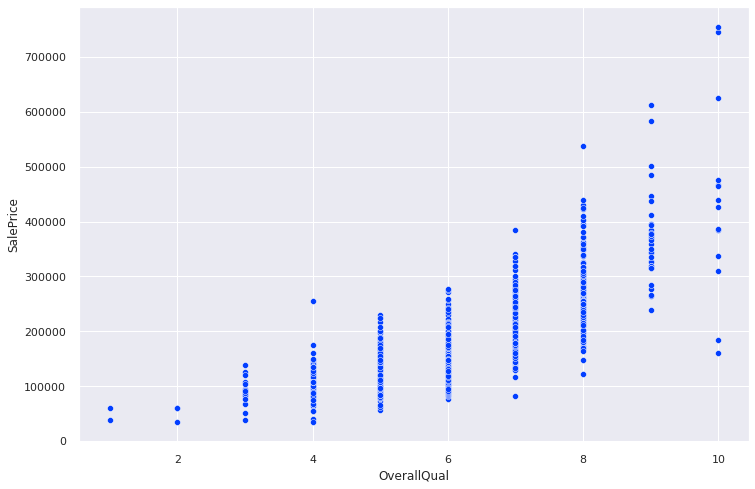

In [17]:
%matplotlib inline
create_scatterplot(train['SalePrice'], train['OverallQual'])

Generally, a scatter plot is not the best way to visualize categorical variables. However; **OverallQual** is an **ordinal** variable, which means that its categories have a specific order (for example 8 is better than 7), so a scatter plot does make sense in this case. In the graph above we can see that there is an apparent relationship between the two features. The price of the houses increases with the overall quality. Let's examine a few more features to determine the outliers. Let's focus on the numerical variables this time.

**SalePrice vs GrLivArea**

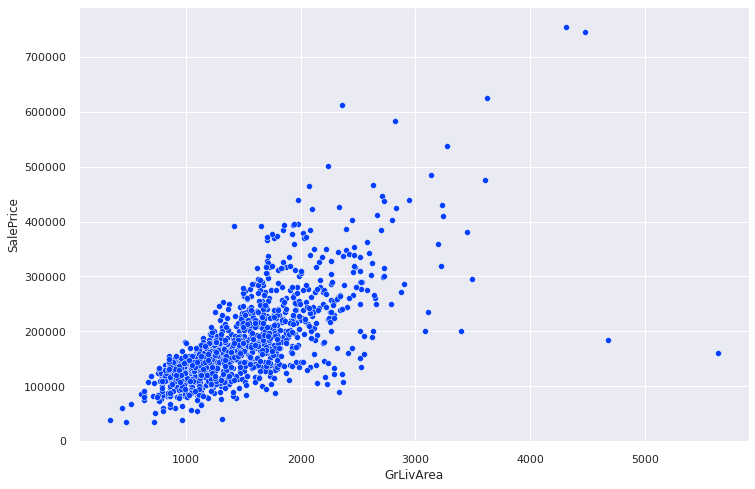

In [18]:
create_scatterplot(train['SalePrice'], train['GrLivArea'])

As you can see, there are two outliers in the plot above. We will get rid off them later. Let's look at another scatter plot with a different feature.

**SalePrice vs TotalBsmtSF**

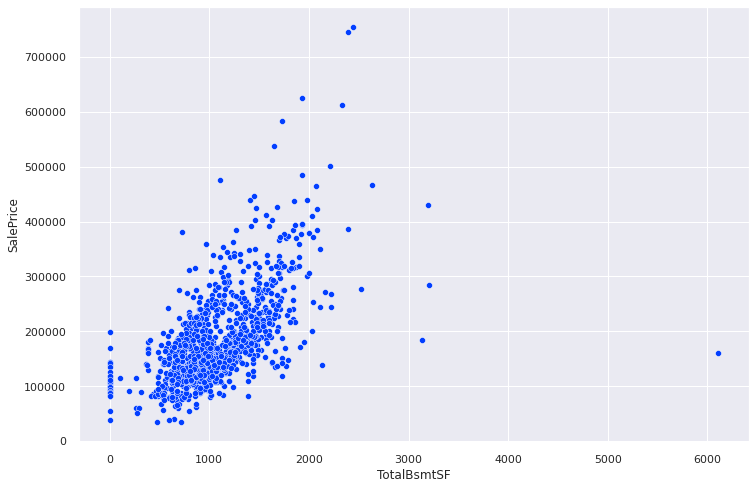

In [19]:
create_scatterplot(train['SalePrice'], train['TotalBsmtSF'])

**SalePrice vs 1stFlrSF**

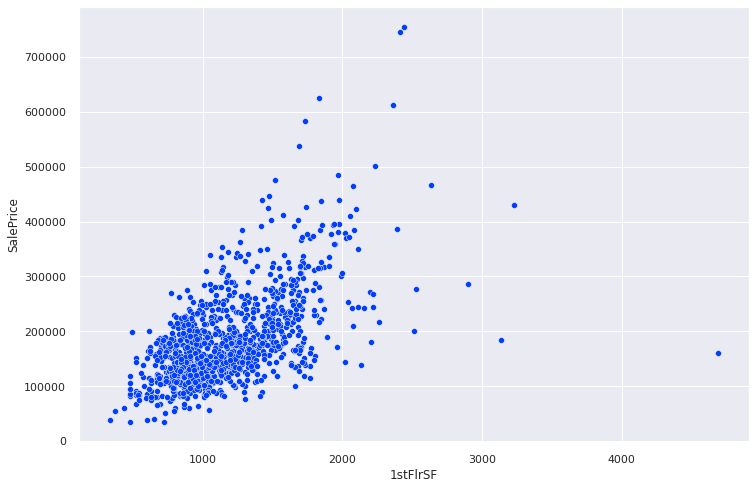

In [20]:
create_scatterplot(train['SalePrice'], train['1stFlrSF']);

## What have we discovered so far?

* Our target variable shows an unequal level of variance across most features. This is called **Heteroscedasticity (will be elaborated later)** and is a red flag for the multiple linear regression model.
* There are some outliers in the scatter plots.

<br>Let's deal with these outliers by removing them from the data

In [21]:
## Deleting the two values with outliers. 
train = train[train['GrLivArea'] < 4500]
train.reset_index(drop = True, inplace = True)

# Assumptions of Regression

* **Linearity** 
* **Homoscedasticity (Constant Error Variance vs Heteroscedasticity).**
* **The target variable is normally distributed when the features values are fixed.**
* **Multivariate Normality (Normality of Errors).**
* **No or little Multicollinearity.** 

Since we fit a linear model, we assume that the relationship between the features and the target is **linear**, and the errors, or residuals, are pure random fluctuations around the true line.    
We expect that the variability in the dependent variable doesn't increase as the value of the features increases, which is the assumptions of equal variance, also known as **Homoscedasticity**.  
We also assume that the observations are independent of one another (**No Multicollinearity**), and that there is no correlation between sequential observations.

These assumptions are prone to happen simultaneously. In other words, if we see that one of these assumptions holds in the dataset, it's more likely that other assumptions mentioned above will hold as well.  
Therefore, we can find and fix various assumptions with a few unique techniques.

So, **How do we check regression assumptions? We fit a regression line and look for the variability of the response data along the regression line.** 

## Linearity

Linear regression requires the relationship between each independent variable and the dependent variable to be linear.  
The linearity assumption can be tested with scatter plots.  
The following example depicts a case where little linearity is present. 

Scatter plotting for SalePrice and GrLivArea

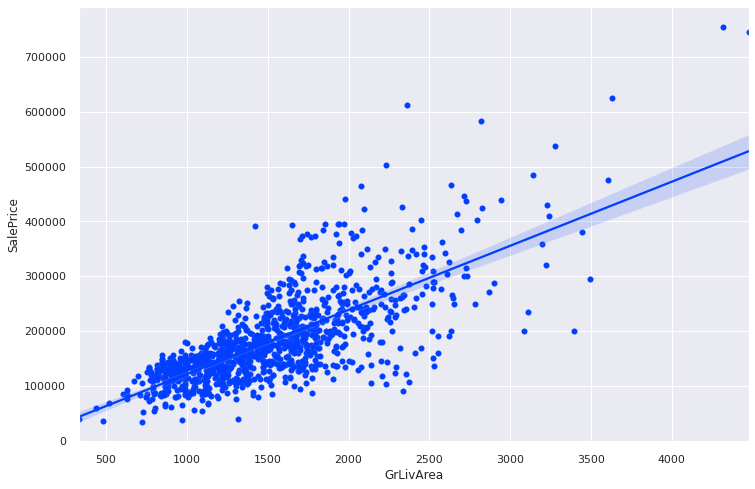

In [22]:
fig, ax1 = plt.subplots(figsize = (12,8), ncols=1,sharey=False)
sns.scatterplot(x = train['GrLivArea'], y = train['SalePrice'],  ax=ax1)
sns.regplot(x=train['GrLivArea'], y=train['SalePrice'], ax=ax1); # plot a regression line. 

Sometimes we may be trying to fit a linear regression model when the data might not be so linear, or the function may need another degree of freedom to fit the data.  
In that case, we may need to change our model depending on the data to get the best possible fit.  

## Homoscedasticity

**Homoscedasticity (Constant Variance):** 
Homoscedasticity describes a situation in which the error/variance/noise in the relationship between the independent variables and the dependent variable is the same across all values of the independent variable.  
In other words, there is a constant variance present in the response variable as the predictor variable increases.  
If the "noise" is not the same across the values of an independent variable, we call that **Heteroscedasticity**.  
As you can guess, it is the opposite of **Homoscedasticity.**


<p><img src="https://www.dummies.com/wp-content/uploads/415147.image1.jpg" style="float:center"></img></p>

This plot above is an excellent example of Homoscedasticity.  

As you can see, the residual variance is the same as the value of the predictor variable increases.  
One way to fix this Heteroscedasticity is by using a transformation method like log-transformation. We will do that later.

In the **GrLivArea**-**SalePrice** scatter plot we see that, as the value of **GrLivArea** 
increases, the variance also increases (i.e. we have heteroscedasticity).

### Let's look at the target - SalePrice

Plot a histogram of the label

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

/root/wd/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


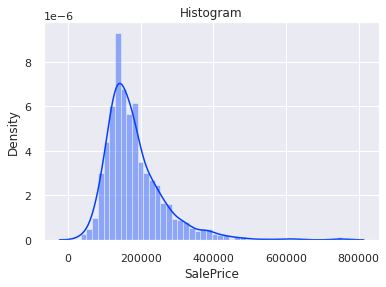

In [24]:
sns.distplot(train.loc[:,'SalePrice'], norm_hist=True)
plt.title('Histogram');

It seems that the distribution is not symmetric and might have some outliers. Another way of visualizing this is by using a boxpot. 

/root/wd/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/root/wd/venv/lib/python3.8/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


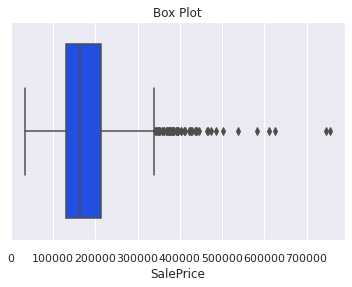

In [25]:
sns.boxplot(train.loc[:,'SalePrice'], orient='v');
plt.title('Box Plot');

These **two** charts above can tell us a lot about our target variable:
* Our target variable, **SalePrice** does not seem to be normally distributed.
* The target variable is right-skewed. 
* There are multiple outliers in the variable.

### Skewness

Skewness is an important attribute of a normal distribtution

<b>Skewness</b> 
According to Wikipedia, 

* "In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.

* For a unimodal distribution, negative skew commonly indicates that the tail is on the left side of the distribution, and positive skew indicates that the tail is on the right. In cases where one tail is long but the other tail is fat, skewness does not obey a simple rule. For example, a zero value means that the tails on both sides of the mean balance out overall; this is the case for a symmetric distribution, but can also be true for an asymmetric distribution where one tail is long and thin, and the other is short but fat."

The following image illustrates the concept of skewness:  
![image](https://cdn-images-1.medium.com/max/1600/1*nj-Ch3AUFmkd0JUSOW_bTQ.jpeg)

Find out the skewness of our label

In [26]:
# skewness
print("Skewness: " + str(train['SalePrice'].skew()))

Skewness: 1.9419472091599583


So, now we can see that there is quite a bit of Skewness in the target variable.  
This might indicate that some transformation is needed on our target variable. 
Right Skewness can usually be fixed by using log transformation.

### Fixing skewness

Now, let's draw the same graphs from above but this time we'll first transform the target variable using a log function 

/root/wd/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


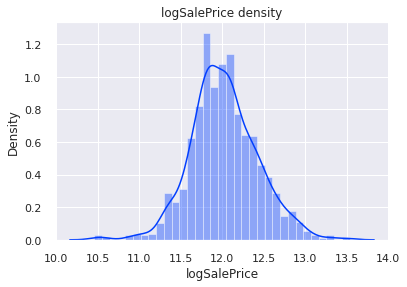

In [27]:
# transform the target variable using numpy.log1p, 
train["logSalePrice"] = np.log(train["SalePrice"])

# plot the newly transformed target
sns.distplot(train['logSalePrice'], norm_hist=True)
plt.title('logSalePrice density');

/root/wd/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/root/wd/venv/lib/python3.8/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


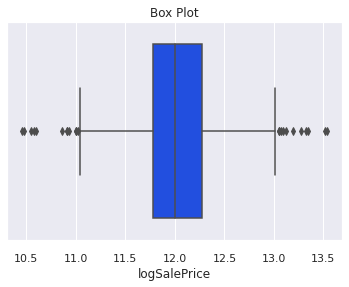

In [28]:
sns.boxplot(train['logSalePrice'], orient='v');
plt.title('Box Plot');

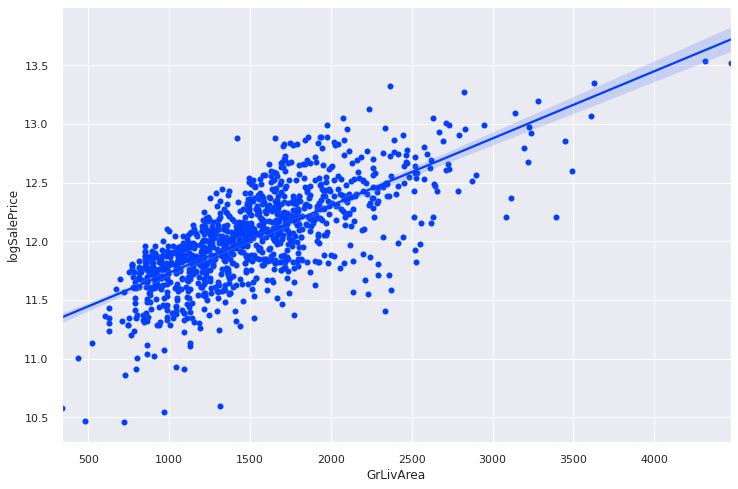

In [29]:
fig, ax1 = plt.subplots(figsize = (12,8), ncols=1,sharey=False)
sns.scatterplot(x = train['GrLivArea'], y = train['logSalePrice'],  ax=ax1)
sns.regplot(x=train['GrLivArea'], y=train['logSalePrice'], ax=ax1); # plot a regression line. 

As you can see, the log transformation fixes the heteroscedasticity of the target variable.

## The target variable is normally distributed when the features values are fixed

In plain words, we want to make sure that for each x value, y is a random variable following a normal distribution and its mean lies on the regression line.

Let's choose one of the values of 'OverallQual' feature:  
Do the following for SalePrice and logSalePrice:
1. Plot histogram of the target for OverallQual == 8
2. Check the skewness

SalePrice

/root/wd/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


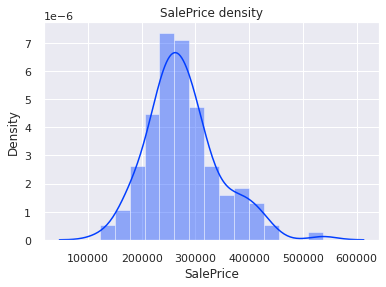

In [30]:
sns.distplot(train.loc[train['OverallQual'] == 8,'SalePrice'], norm_hist=True)
plt.title('SalePrice density');

In [31]:
train.loc[train['OverallQual'] == 8,'SalePrice'].skew()

0.745782416459045

logSalePrice

/root/wd/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


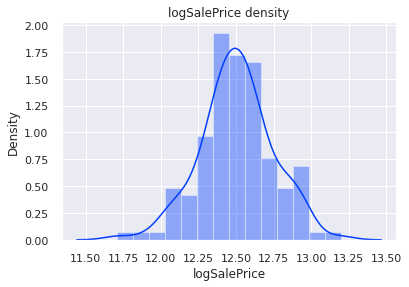

In [32]:
sns.distplot(train.loc[train['OverallQual'] == 8,'logSalePrice'], norm_hist=True)
plt.title('logSalePrice density');

In [33]:
train.loc[train['OverallQual'] == 8,'logSalePrice'].skew()

-0.1295465919510365

So, as we can see the log transforamtion makes the target variable follow our assumption more closely.

## No or Little multicollinearity

Multicollinearity is when there is a strong correlation between independent variables. Linear regression or multilinear regression requires independent variables to have few or no similar features. Multicollinearity can lead to a variety of problems, including:
* The effect of predictor variables estimated by our regression will depend on what other variables are included in our model. 
* Predictors can have wildly different results depending on the observations in our sample, and small changes in samples can result in very different estimated effects. 
* We can no longer interpret a coefficient on a variable as the effect on the target of a one-unit increase in that variable holding the other variables constant. The reason behind that is, when predictors are strongly correlated, there is not a scenario in which one variable can change without a conditional change in another variable.

A clustermap is an excellent way to identify whether there is multicollinearity or not. One way to solve multicollinearity is to use regularization methods like Ridge or Lasso.

<Figure size 2160x2160 with 0 Axes>

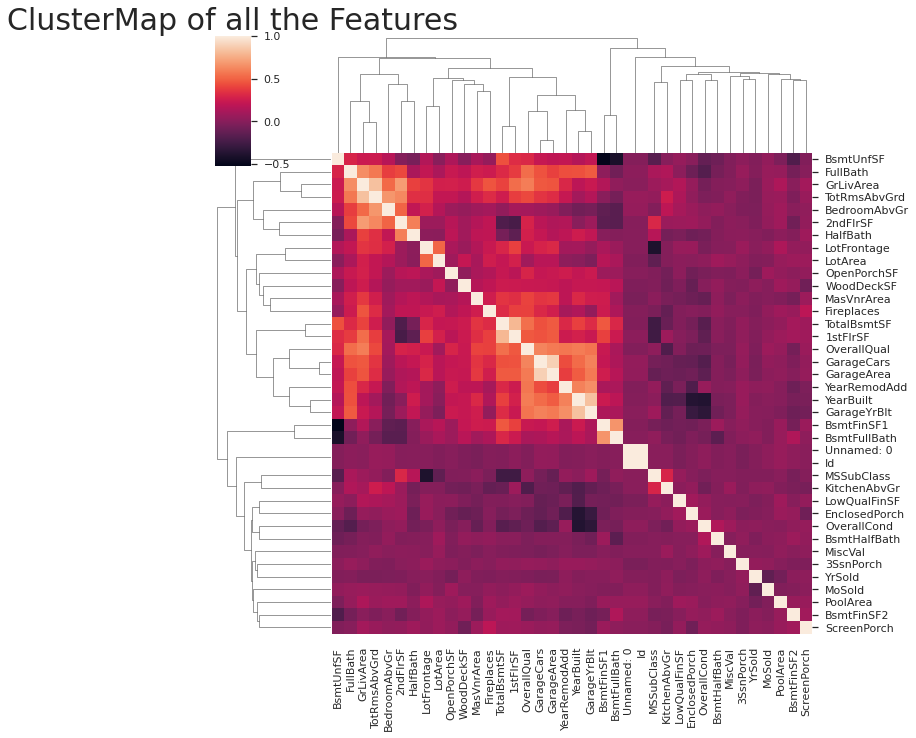

In [34]:
plt.figure(figsize=(30, 30))
sns.clustermap(train.drop(columns = ['SalePrice', 'logSalePrice']).corr(), xticklabels=True, yticklabels=True)
plt.title("ClusterMap of all the Features", fontsize = 30)
plt.show();

The clustermap arranges correlated features side-by-side. This way it is easier to identify correlated clusters of features (bright squares).  
As we can see, the multicollinearity still exists between various features (bright squares of 2 features or more). However, we will keep them for now for the sake of learning and let the models do the clean up later on. Let's go through some of the correlations. 

* **GarageYrBlt** and **YearBuilt**. 
* **TotRmsAbvGrd** and **GrLivArea**. 
* **GarageCars** and **GarageArea**. 
* **1stFlrSF** and **TotalBsmtSF**  
If we were using only multiple linear regression, it would have been better to delete one feature of each of these feature-pairs from the dataset to fit better multiple linear regression models.  
However since scikit learn modules makes it easy to implement them and get the best possible outcome, we will be using many algorithms.
Therefore, we will keep all the features for now. 

# Preparing data for training

Drop the **Id** column from both the train and test datasets

In [35]:
# Dropping the "Id" from train and test set. 

X_train = train.drop(columns=['Id'],axis=1)
X_test = test.drop(columns=['Id'],axis=1)

Save the targets into separate series called **y_train** and **y_test**

In [36]:
# Saving the target values in "y". 
y_train = train['logSalePrice'].reset_index(drop=True)
y_test = np.log(test['SalePrice']).reset_index(drop=True)

## Combining train and test datasets together
In this section we'll fill in missing values, and do some feature engineering and selection. Since these are operations we can apply to both the training and test set, will concatenate them so that we can do all the work at once.

We just need to add a column which indicates which rows came from which dataset.

In [37]:
X_train['set'] = 'Train'
X_test['set'] = 'Test'

In [38]:
all_data = pd.concat([X_train, X_test]).reset_index(drop=True)

Drop the target variable from all_data

In [39]:
all_data = all_data.drop(['SalePrice', 'logSalePrice'], axis = 1)

## Missing values

Write a function that, given a dataframe df, creates a table with the number and percentage of missing values in each column, sorted in desceding order.

In [40]:
# first verify that missing data are encoded as nans
for col in all_data.select_dtypes(exclude="number").columns:
    display(all_data[col].value_counts(dropna=False))

RL         1149
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Pave    1452
Grvl       6
Name: Street, dtype: int64

NaN     1367
Grvl      50
Pave      41
Name: Alley, dtype: int64

Reg    925
IR1    483
IR2     41
IR3      9
Name: LotShape, dtype: int64

Lvl    1311
Bnk      61
HLS      50
Low      36
Name: LandContour, dtype: int64

AllPub    1457
NoSeWa       1
Name: Utilities, dtype: int64

Inside     1051
Corner      262
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Gtl    1380
Mod      65
Sev      13
Name: LandSlope, dtype: int64

NAmes      225
CollgCr    150
OldTown    113
Edwards     98
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

Norm      1260
Feedr       80
Artery      48
RRAn        26
PosN        18
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

Norm      1444
Feedr        6
RRNn         2
Artery       2
PosA         1
RRAe         1
RRAn         1
PosN         1
Name: Condition2, dtype: int64

1Fam      1218
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

1Story    726
2Story    443
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

Gable      1141
Hip         284
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

CompShg    1433
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Roll          1
Membran       1
Name: RoofMatl, dtype: int64

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     60
BrkFace     50
WdShing     26
Stucco      24
AsbShng     20
BrkComm      2
Stone        2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     59
Wd Shng     38
BrkFace     25
Stucco      25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

None       864
BrkFace    445
Stone      126
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

TA    906
Gd    488
Ex     50
Fa     14
Name: ExterQual, dtype: int64

TA    1280
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

PConc     645
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

TA     649
Gd     618
Ex     119
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

TA     1309
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64

No     953
Av     221
Gd     132
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64

Unf    430
GLQ    416
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64

Unf    1254
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

GasA     1426
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

Ex    739
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

Y    1363
N      95
Name: CentralAir, dtype: int64

SBrkr    1332
FuseA      94
FuseF      27
FuseP       3
NaN         1
Mix         1
Name: Electrical, dtype: int64

TA    735
Gd    586
Ex     98
Fa     39
Name: KitchenQual, dtype: int64

Typ     1358
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

NaN    690
Gd     378
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

Attchd     869
Detchd     387
BuiltIn     87
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

Unf    605
RFn    422
Fin    350
NaN     81
Name: GarageFinish, dtype: int64

TA     1309
NaN      81
Fa       48
Gd       14
Ex        3
Po        3
Name: GarageQual, dtype: int64

TA     1324
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64

Y    1338
N      90
P      30
Name: PavedDrive, dtype: int64

NaN    1452
Gd        2
Ex        2
Fa        2
Name: PoolQC, dtype: int64

NaN      1177
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

NaN     1404
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

WD       1267
New       120
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

Normal     1198
Partial     123
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

Train    1166
Test      292
Name: set, dtype: int64

<span style="color:teal">
    It seems that all values apart from NaN describe a legitimate value. For numeric columns, encoding NaN as anything other than NaN is less common, although it does happen from time to time (and it's VERY annoying)
</span>

In [41]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [42]:
missing_percentage(train)

,Total,Percent
PoolQC,1160,99.4900
MiscFeature,1119,95.9700
Alley,1094,93.8300
Fence,948,81.3000
FireplaceQu,554,47.5100
LotFrontage,205,17.5800
GarageCond,66,5.6600
GarageQual,66,5.6600
GarageType,66,5.6600
GarageFinish,66,5.6600


**Imputing Missing Values**

Some missing values are intentionally left blank, for example: In the Alley feature 
there are blank values meaning that there are no alley's in that specific house. 

In [43]:
missing_val_col_true_none = ["Alley", "PoolQC", "MiscFeature", "Fence",
                             "FireplaceQu", "GarageType", "GarageFinish", 
                             "GarageQual", "GarageCond", 'BsmtQual', 
                             'BsmtCond','BsmtExposure', 'BsmtFinType1', 
                             'BsmtFinType2', 'MasVnrType']

In [44]:
all_data[missing_val_col_true_none].fillna(np.nan, inplace = True)

/root/wd/venv/lib/python3.8/site-packages/pandas/core/frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In the following features the null values are there for a purpose, so we replace them with "0"


In [45]:
missing_val_col_zero = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                        'TotalBsmtSF', 'BsmtFullBath',  'BsmtHalfBath', 
                        'GarageArea', 'GarageCars', 'MasVnrArea']

In [46]:
all_data[missing_val_col_zero] = all_data[missing_val_col_zero].fillna(0)

Some missing values are actually missing. It is sometimes reasonable to fill them with the mean value of the feature (across all entries). This way, the mean the of feature is preserved.
We will use this method on the LotFrontage feature, however, instead of simply filling the missing values with the mean of the feature across the entire dataset, we will calculate the mean for every neighborhood independently.

Create a series, with neighborhood names as indices, containing the mean LotFrontage value **in X_train** of each neighborhood

In [47]:
Neighborhood_means = X_train.groupby('Neighborhood')['LotFrontage'].mean()
Neighborhood_means

Neighborhood
Blmngtn   48.0000
Blueste   24.0000
BrDale    21.6923
BrkSide   58.6923
ClearCr   84.3000
CollgCr   71.5149
Crawfor   72.5455
Edwards   66.0556
Gilbert   81.2195
IDOTRR    61.8148
MeadowV   27.5833
Mitchel   69.7879
NAmes     76.0764
NPkVill   33.6667
NWAmes    80.9688
NoRidge   91.1200
NridgHt   80.4167
OldTown   63.0805
SWISU     57.1765
Sawyer    75.7561
SawyerW   71.6444
Somerst   65.2687
StoneBr   62.8667
Timber    79.8333
Veenker   49.6000
Name: LotFrontage, dtype: float64

Replace all missing values in all_data['LotFrontage'] by the mean LotFrontage in their neighborhood, according to X_train

In [48]:
all_data['LotFrontage'].fillna(Neighborhood_means[all_data['Neighborhood']].reset_index()['LotFrontage'], inplace = True)

Question: Why did we only use the X_train to calculate the mean?

Answer: <span style="color:teal">In order to avoid data leakage from the test set.</span>

Another example of such a feature is GarageYrBlt. Repeat the process above for this feature, and take the neighborhood median for it.

In [49]:
Neighborhood_means_GYB = X_train.groupby('Neighborhood')['GarageYrBlt'].median()
Neighborhood_means_GYB

Neighborhood
Blmngtn   2,005.5000
Blueste   1,980.0000
BrDale    1,972.0000
BrkSide   1,939.5000
ClearCr   1,966.0000
CollgCr   2,002.0000
Crawfor   1,947.5000
Edwards   1,957.0000
Gilbert   2,000.0000
IDOTRR    1,952.0000
MeadowV   1,973.0000
Mitchel   1,980.0000
NAmes     1,962.0000
NPkVill   1,976.5000
NWAmes    1,976.0000
NoRidge   1,995.0000
NridgHt   2,006.0000
OldTown   1,949.5000
SWISU     1,934.0000
Sawyer    1,967.0000
SawyerW   1,990.0000
Somerst   2,006.0000
StoneBr   2,001.0000
Timber    2,002.0000
Veenker   1,982.5000
Name: GarageYrBlt, dtype: float64

Replace all missing values in all_data['GarageYrBlt'] by the mean LotFrontage in their neighborhood, according to X_train

In [50]:
all_data['GarageYrBlt'].fillna(Neighborhood_means_GYB[all_data['Neighborhood']].reset_index()["GarageYrBlt"], inplace = True)

### **Missing values in categorical features**

Some categorical features in the data are encoded as integers, even though they should be strings:

In [51]:
all_data[['MSSubClass', 'YrSold', 'MoSold']].dtypes

MSSubClass    int64
YrSold        int64
MoSold        int64
dtype: object

In [52]:
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str) 

In [53]:
all_data[['MSSubClass', 'YrSold', 'MoSold']].dtypes

MSSubClass    object
YrSold        object
MoSold        object
dtype: object

Since in categorical features there is no concept of "mean", we will fill the missing values with the most common category. Replace missing values in the following features by their most common value (i.e. their <a href= "https://en.wikipedia.org/wiki/Mode_(statistics)#:~:text=The%20mode%20is%20the%20value,most%20likely%20to%20be%20sampled.">mode</a>)

In [54]:
['SaleType','Functional','MSZoning','Utilities',
 'Exterior1st','Exterior2nd','KitchenQual',
 'SaleType','Electrical']

['SaleType',
 'Functional',
 'MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'KitchenQual',
 'SaleType',
 'Electrical']

In [55]:
all_data.fillna(
    {
        'SaleType': X_train['SaleType'].mode()[0],
        'Functional': X_train['Functional'].mode()[0],
        'MSZoning': X_train['MSZoning'].mode()[0],
        'Utilities': X_train['Utilities'].mode()[0],
        'Exterior1st': X_train['Exterior1st'].mode()[0],
        'Exterior2nd': X_train['Exterior2nd'].mode()[0],
        'KitchenQual': X_train['KitchenQual'].mode()[0], 
        'SaleType': X_train['SaleType'].mode()[0],
        'Electrical': X_train['Electrical'].mode()[0],
    }, inplace = True   
)

We will check how many missing values are left undealt with. Notice that we are checking missing values only on features which we didn't fill with NaN on purpose.

In [56]:
missing_percentage(all_data.drop(columns = missing_val_col_true_none))

,Total,Percent


So, there are no missing value left. 

## Creating New Features

Create new features called ['haspool','has2ndfloor','hasgarage','hasbsmt','hasfireplace'] which attain the value 1 if the house has the corresponding amenity (pool, 2nd floor etc) and 0 otherwise.

In [57]:
all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [58]:
all_data.shape

(1458, 86)

## Deleting features

Removing the features used to create the new features so avoid feature dependancy

In [59]:
all_data.drop(columns = ['PoolArea', '2ndFlrSF', 'GarageArea', 'TotalBsmtSF', 'Fireplaces'], inplace = True)

Use value_counts() to check which features have low variability. Remove the 3 features with the lowest variability (take care not to remove the columns `set`, though)

In [60]:
all_data.nunique().sort_values().iloc[:50]

CentralAir       2
hasgarage        2
has2ndfloor      2
haspool          2
set              2
hasbsmt          2
Utilities        2
hasfireplace     2
Alley            2
Street           2
LandSlope        3
PoolQC           3
PavedDrive       3
GarageFinish     3
BsmtHalfBath     3
HalfBath         3
LandContour      4
BsmtExposure     4
BsmtCond         4
BsmtQual         4
LotShape         4
BsmtFullBath     4
ExterQual        4
MasVnrType       4
KitchenQual      4
KitchenAbvGr     4
Fence            4
MiscFeature      4
FullBath         4
FireplaceQu      5
GarageCars       5
GarageQual       5
GarageCond       5
YrSold           5
Electrical       5
HeatingQC        5
MSZoning         5
LotConfig        5
ExterCond        5
BldgType         5
RoofStyle        6
Heating          6
BsmtFinType2     6
GarageType       6
BsmtFinType1     6
Foundation       6
SaleCondition    6
Functional       7
RoofMatl         7
Condition2       8
dtype: int64

In [61]:
all_data = all_data.drop(['Utilities', 'Street', 'PoolQC'], axis=1)

Question: why have we decided to delete these features?

Answer: <span style="color:teal">value_counts shows extremely low variablity of values. Therefore these features will probably not contribute to our model.</span>

## Creating Dummy Variables. 


A dummy variable is a way to convert categorical variable into numerical variable used in regression to represent subgroups of the feature.  
For example: 
if we have a feature with 'yes' / 'no' categories, we would use a 0,1 dummy variable where a 1 is given for 'yes' and 0 for 'no'.  

Dummy variables are useful because they enable us to use a single regression equation to represent multiple groups.  
This means that we don’t need to write out separate models for each subgroup.

Find all categorical features and use pd.get_dummies to replace them with dummy variable. Make sure to remove the original features from your dataframe.

In [62]:
all_data.isna().mean().sort_values()

Unnamed: 0     0.0000
TotRmsAbvGrd   0.0000
KitchenQual    0.0000
KitchenAbvGr   0.0000
BedroomAbvGr   0.0000
                ...  
GarageType     0.0556
FireplaceQu    0.4733
Fence          0.8073
Alley          0.9376
MiscFeature    0.9630
Length: 78, dtype: float64

In [63]:
categorical_columns = all_data.select_dtypes(exclude="number").columns.difference(["set"]).tolist()

In [64]:
final_features = (
    all_data.drop(columns= categorical_columns)
    .join(
        pd.get_dummies(all_data[categorical_columns])
    ).reset_index(drop=True)
)
final_features.shape

(1458, 311)

## Spltting back to train and test
Split the all_data dataframe back to X_train and X_test

In [65]:
X_train = final_features.query("set=='Train'").drop(columns=["set"])
X_test = final_features.query("set=='Test'").drop(columns=["set"])

# Learning 

Before we start training models and comparing them, we need some notion of "quality" of a model, that will allow us to compare various models and choose the best one.

A most common such notion is the **Mean Squared Error (MSE)** which you have encountered in class. For a given label vector $y$ and predicted labels $\hat{y}$, we have $MSE(y, \hat{y})=\frac{1}{n}\sum_{i=1}^{n}{(y_i - \hat{y_i}) ^ 2}$.
First, let us consider a constant model - that is, a model that predicts the same value for all samples, regardless of their features.

**Question**: What is the constant model with the least MSE? Prove your answer. What is its MSE on our train and test set?

**Answer**: <span style="color:teal">
    The mean.
    </span>

Compute the MSE of your model against the constant model you found. Use sklearn.metrics.mean_squared_error. What is the model's score for the test set? What is its score for the training set?

In [66]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, np.repeat(y_train.mean(), len(y_test)), squared=False)

0.38673782861747225

## Now let's train a model using a single feature, GrLivArea, how much better is it?

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lm = LinearRegression()
lm.fit(X_train['GrLivArea'].values.reshape(-1, 1), y_train)
lm.score(X_train['GrLivArea'].values.reshape(-1, 1), y_train), lm.score(X_test['GrLivArea'].values.reshape(-1, 1), y_test)

(0.5215072596139361, 0.5450658104789683)

In [69]:
mean_squared_error(lm.predict(X_train['GrLivArea'].values.reshape(-1, 1)), y_train, squared=False), mean_squared_error(lm.predict(X_test['GrLivArea'].values.reshape(-1, 1)), y_test, squared=False)

(0.2785810561912872, 0.26084909362586606)

## OK, now lets try using **all** features

In [70]:
X_train.isna().mean().sort_values()

Unnamed: 0            0.0000
MSSubClass_160        0.0000
MSSubClass_120        0.0000
LotShape_Reg          0.0000
LotShape_IR3          0.0000
                       ...  
Exterior1st_BrkComm   0.0000
Exterior1st_AsphShn   0.0000
Exterior1st_AsbShng   0.0000
Exterior1st_ImStucc   0.0000
YrSold_2010           0.0000
Length: 310, dtype: float64

In [71]:
lm.fit(X_train, y_train)

LinearRegression()

In [72]:
mean_squared_error(lm.predict(X_train), y_train, squared=False)

0.09014267413000313

In [73]:
mean_squared_error(lm.predict(X_test), y_test, squared=False)

0.10718872902166984

Cool! So adding more features and making our model more complex improves our model. Will more complex models always perform better than simpler models? 

## Let's try adding degree-2 polynomial features
that is, the square of every feature and the product of every pair of features

Use <a href=https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html>sklearn.preprocessing.PolynomialFeatures</a> to create a dataframe of all degree 2 combinations of features in your data, and apply a linear regression to the transformed dataset.

_Note:_ use <a href= "https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">sklearn.pipeline.Pipeline</a> to create a model that squares all features and predicts in one go. This will also be useful for future steps.

In [74]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
pf = PolynomialFeatures(2)
pp = Pipeline([('poly', pf), ('lm', lm)])

In [75]:
pp.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()), ('lm', LinearRegression())])

What is your new model's MSE on the training and test sets?

In [76]:
mean_squared_error(pp.predict(X_train), y_train, squared=False), mean_squared_error(pp.predict(X_test), y_test, squared=False)

(3.160936249506339e-11, 0.6231691743277598)

Oh dear! The train MSE is now almost 0, but the test score is even worse than that of the constant model. This is since the model is now over complicated and rather than learning the underlying structure of the data, it is memorizing the training data. This is called overfitting. One common way to combat this is by adding a regularization term, which penalizes models for overcomplicating and motivates them to choose simpler solution. 

Let's try adding an L1 regularization term (this is called the LASSO model), which adds the sum of absolute values of the weights to the loss. Use <a href= "https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html">sklearn.linear_model.Lasso</a> with an alpha value of 0.009 and see if the model improves.

In [77]:
ss = StandardScaler()
from sklearn.linear_model import Lasso
lasso = Lasso(0.009)
p3 = Pipeline([('poly', pf), ('lasso', lasso)])
p3.fit(X_train, y_train)
mean_squared_error(p3.predict(X_train), y_train, squared=False), mean_squared_error(p3.predict(X_test), y_test, squared=False)

/root/wd/venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6537497407002506, tolerance: 0.01891151661022882
  model = cd_fast.enet_coordinate_descent(


(0.01457158310570703, 0.26493882918577044)

This is a little better but still not as good as it should be. Let's try normalizing the data and see if that helps.

In [78]:
p3 = Pipeline([('ss', ss), ('poly', pf), ('lasso', lasso)])
p3.fit(X_train, y_train)
mean_squared_error(p3.predict(X_train), y_train, squared=False), mean_squared_error(p3.predict(X_test), y_test, squared=False)

(0.08261434396572145, 0.10521294278330244)

Good, we fixed the overfitting and even made a slight improvement.
Why is normalization important when adding regularization? What would happen if we normalize in unregularized linear regression?

# A note about regularization

In the unregularized setting, normalizing doesn't affect the solution. Consider $X, y$ and $A, b$ which minimizes $||AX+b - y||$. Now suppose we normalize $X$ to get $D(X-\bar{X})$ where $D$ is a diagonal matrix that scales $X$ - we now try to minimize $||AD(X-\bar{X})+b - y||$, but rewriting $A'=AD, b'=b - AD \bar{X}$ we see that we can move the normalization into the solution that minimizes with resepect to the unnormalized $X$. However, when adding regularization, we "punish" each feature based on the magnitude of its coefficient, so scaling a feature by $c$ and its coefficient by $\frac{1}{c}$  are no longer equivalent since we change the punishment for that coefficient. This means that we disproportionately punish features of smaller scale and the solution may become dominated by features of larger scale which require smaller coefficients to produce the same impact on the prediction